# Unsupervised Machine Learning 

**Logistic Regression**
1. Importing libraries
2. Data cleaning 
3. Checking variables
    1. Investigating categorical variables
    2. Investigating continous variables
            A. Length of service
            B. Age
4. Scatterplot
5. Splitting data into independent (X) and dependent (y) variables on *age* 
6. Feature scaling
7. Splitting the dataset into train and test sets
8. Fitting the logistic regression model and predicting test results
9. Evaluating the model

**Linear Regression**
1. Scatterplot
2. Reshaping the variables
3. Splitting data into test and train 
5. Fitting the logistic regression model and predicting test results
6. Evaluating the model

# Logistic Regression

The overall aim with this analysis is to understand whether there are variables which could help predict attrition. Given that the dependent variable, *employment status* is categorical, I will initially be using logistic regression to analyse the data. 

### 1. Importing libraries and datasets

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
#ensuring graphs created are displayed within the notebook without the need to "call" them specifically.
%matplotlib inline

In [3]:
#creating path
path = r'C:\Users\rutha\CareerFoundry\04-23_EmployeeAttrition\02_Data'

In [4]:
#import data set
df = pd.read_csv(os.path.join(path, 'Prepared_data', 'encoded_data.csv'), index_col=False)

In [5]:
#checking output
df.head()

,Unnamed: 0,country,department_name,terminationdate_key,age,length_of_service,job_title,store_number,year_of_record,population,...,large_country,medium_country,small_country,c_suite,associate,director,manager,older_adults,mid_adults,young_adults
0,0,Germany,Executive,01/01/1900,52,17,CEO,35,2006,83783942,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1,Germany,Executive,01/01/1900,53,18,CEO,35,2007,83783942,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,2,Germany,Executive,01/01/1900,54,19,CEO,35,2008,83783942,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,3,Germany,Executive,01/01/1900,55,20,CEO,35,2009,83783942,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,4,Germany,Executive,01/01/1900,56,21,CEO,35,2010,83783942,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [6]:
#dropping index column
df = df.drop(columns=['Unnamed: 0'])

In [7]:
#checking output
df.head()

,country,department_name,terminationdate_key,age,length_of_service,job_title,store_number,year_of_record,population,pop_flag,...,large_country,medium_country,small_country,c_suite,associate,director,manager,older_adults,mid_adults,young_adults
0,Germany,Executive,01/01/1900,52,17,CEO,35,2006,83783942,large_country,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,Germany,Executive,01/01/1900,53,18,CEO,35,2007,83783942,large_country,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,Germany,Executive,01/01/1900,54,19,CEO,35,2008,83783942,large_country,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,Germany,Executive,01/01/1900,55,20,CEO,35,2009,83783942,large_country,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,Germany,Executive,01/01/1900,56,21,CEO,35,2010,83783942,large_country,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [8]:
df.shape

(49644, 36)

### 2. Data Cleaning

In [9]:
df.columns

Index(['country', 'department_name', 'terminationdate_key', 'age',
       'length_of_service', 'job_title', 'store_number', 'year_of_record',
       'population', 'pop_flag', 'gender', 'seniority', 'age_flag',
       'termreason_desc', 'termtype_desc', 'business_unit', 'gender.1',
       'employment_status', 'business_unit.1', 'Not Applicable', 'Retirement',
       'Resignaton', 'Layoff', 'Not Applicable.1', 'Voluntary', 'Involuntary',
       'large_country', 'medium_country', 'small_country', 'c_suite',
       'associate', 'director', 'manager', 'older_adults', 'mid_adults',
       'young_adults'],
      dtype='object')

##### Missing values check

In [10]:
#checking for missing values
df.isnull().sum()

country                0
department_name        0
terminationdate_key    0
age                    0
length_of_service      0
job_title              0
store_number           0
year_of_record         0
population             0
pop_flag               0
gender                 0
seniority              0
age_flag               0
termreason_desc        0
termtype_desc          0
business_unit          0
gender.1               0
employment_status      0
business_unit.1        0
Not Applicable         0
Retirement             0
Resignaton             0
Layoff                 0
Not Applicable.1       0
Voluntary              0
Involuntary            0
large_country          0
medium_country         0
small_country          0
c_suite                0
associate              0
director               0
manager                0
older_adults           0
mid_adults             0
young_adults           0
dtype: int64

**Observations:** No missing values observed

##### Duplicate values check 

In [11]:
#checking for duplicate
dups = df.duplicated()

In [12]:
dups.shape

(49644,)

**Observations:** No duplicate values observed

### A. Investigating a selection of variables needed for our analyses

Checking that are variables are as expected, with no obvious outliers. 

###### Independent Variable: employment status

<AxesSubplot:xlabel='employment_status', ylabel='count'>

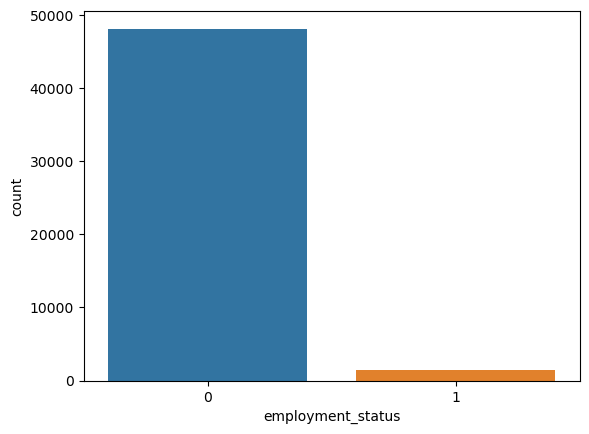

In [13]:
sns.countplot(x='employment_status', data=df)

**Observations:** as observed in the data cleaning and preparation stage of this project, we have a very imbalanced independent variable.  97% of values in our indpendent variable fall into the *Active* or *0* value, and 3% fall into the *Terminated* or *1* value. 

### B. Investigating Continuous Variables

##### 1. Independent variable: Length of Service

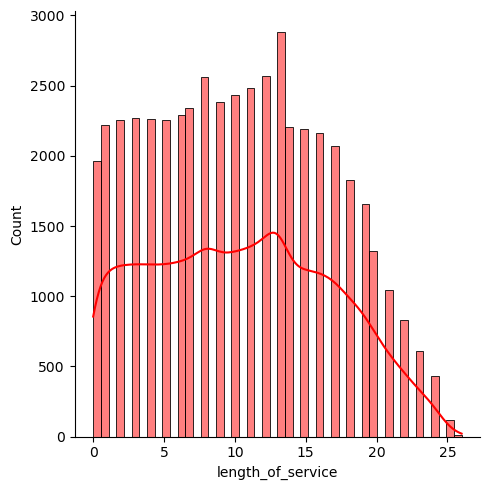

In [14]:
#checking the distribution of length of service
sns.displot(x='length_of_service', data=df, color='red', kde='true')

**Observations:** A right-tailed distribution when looking at *length of service* is to be expected as employees move from company-to-company during their career, so we would expect to see a higher number of lower-count *lengths of service* compared to high-counts. 

##### 2. Independent variable: Age 

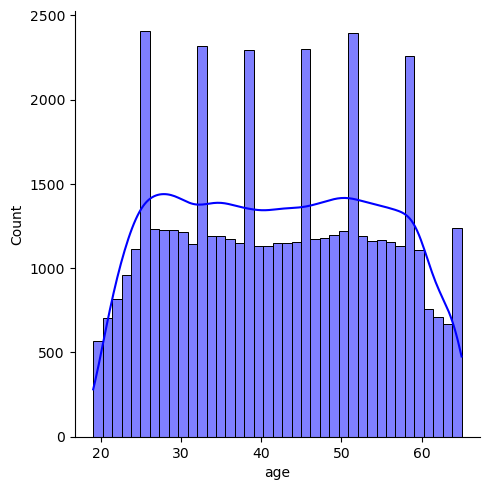

In [15]:
#checking the distribution of length of service
sns.displot(x='age', data=df, color='blue', kde='true')

**Observations:** as detailed previously, this is a fictional dataset created using fake data generators, R, and the application of randomised functions. I wouldn't typically expect to see such regular peaks in employee ages in a real dataset. Interestingly the trend line flattens between ages 27 and 60.  

### 4. Scatterplot

Using scatterplots to visualise the relationship between our dependent and independent variables. 

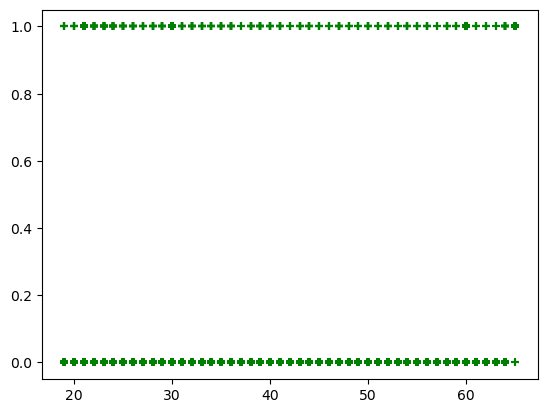

In [16]:
#plotting age and employment status
plt.scatter(df.age,df.employment_status, marker='+', color='green')

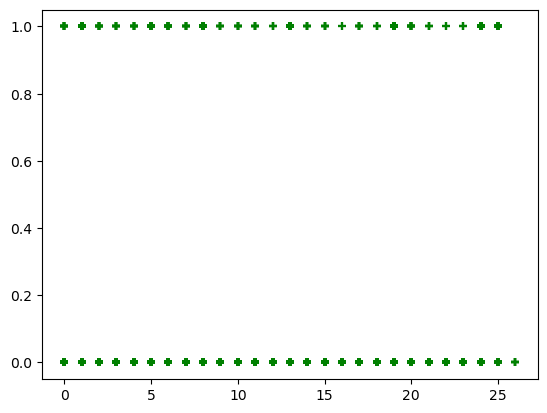

In [17]:
#plotting age and length of service
plt.scatter(df.length_of_service,df.employment_status, marker='+', color='green')

**Observations:** this dataset contains over 49,664 rows which would usually be good for a scatterplot, however, since our dependent variable is catergorical a scatterplot won't be able to accurately display all values. 

What we can see in both charts are datapoints that are **bolder** than others, indicating a higher frequency count of that particular value. 

### 5 . Splitting data into independent (X) and dependent (y) variables on *age*

In [18]:
#identifying the column index for the age variable
idx=df.columns.get_loc("age")
print("Column Index : "+ str(idx))

Column Index : 3


In [19]:
#defining dependent variables
X = df.iloc[:,[3]]
X.head()

,age
0,52
1,53
2,54
3,55
4,56


In [20]:
#identifying the column index for the length of service variable
idx=df.columns.get_loc("employment_status")
print("Column Index : "+ str(idx))

Column Index : 17


In [22]:
#defining independent variable
y = df.iloc[:,17]
y

0        0
1        0
2        0
3        0
4        0
        ..
49639    1
49640    1
49641    1
49642    1
49643    1
Name: employment_status, Length: 49644, dtype: int64

### 6. Feature Scaling 

Feature scaling helps to normalise the range of independent variables, which is important, particularly when working with large dataset. 

In [23]:
#defining StandardScaler
sc = StandardScaler()

In [24]:
X = sc.fit_transform(X)
X

array([[ 0.79839445],
       [ 0.87885677],
       [ 0.95931908],
       ...,
       [-0.89131413],
       [-1.05223876],
       [-1.53501264]])

### 7. Splitting the dataset into train and test sets 

Splitting the dataset into train and test sets so we can execute our model on the train set, and verify using the test set. 

I have used a **stratify** split because of the imbalance in our independent variable. 

In [25]:
#creating out train and test variables using a stratify split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, stratify=y)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(34750, 1)
(14894, 1)
(34750,)
(14894,)


### 8. Fitting the logistic regression model and predicting test results

Now we have prepared the dataset, we can train the model using the LogisticRegression clas of scikit-learn.

In [26]:
#defining our classifier
classifier = LogisticRegression()

In [27]:
#applying classifier to our data
classifier.fit(X_train, y_train)

LogisticRegression()

In [28]:
#performing a prediction on the test set using the predict method
y_pred = classifier.predict(X_test)

In [29]:
#creating a dataframe and comparing the predicted and actual values
result = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
result

,Actual,Predicted
31152,1,0
19681,0,0
25148,0,0
37794,0,0
7027,0,0
...,...,...
46485,0,0
11903,0,0
26904,0,0
41778,0,0


In [30]:
#looking at coefficient and intercept
classifier.coef_

array([[0.87332525]])

In [31]:
classifier.intercept_

array([-3.82038503])

### 9. Evaluating the model

In [32]:
#using the confusion matrix to look true negatives, false negative, false positives, and true positives
cf_matrix = confusion_matrix(y_test, y_pred)
cf_matrix

array([[14449,     0],
       [  445,     0]], dtype=int64)

Text(0.5, 23.52222222222222, 'Predicted label')

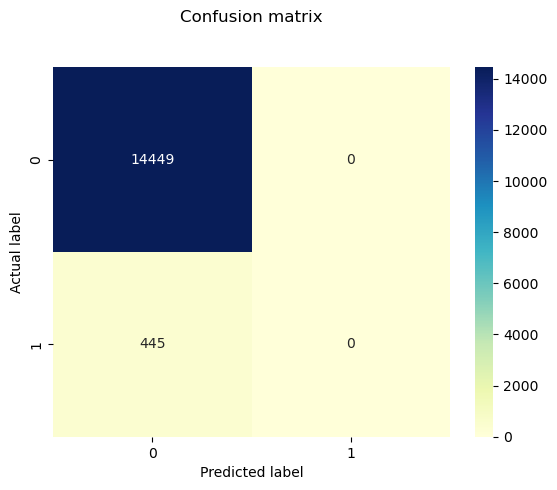

In [33]:
#viewing this as a heatmap
sns.heatmap(pd.DataFrame(cf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

**Observations:** we have 14449 **True negatives** and 445 **False negatives**, we also have 0 **false predictions** and 0 **true predictions**.

In [34]:
#checking the model's accuracy 
Accuracy = (14449+0)/(14449+0+0+445)
Accuracy

0.9701221968577951

**Observations:** the accuracy of our model is 97%

In [35]:
#using a classification report to give a comprehensive review of the model's performance
target_names = ['active', 'terminated']

In [36]:
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      active       0.97      1.00      0.98     14449
  terminated       0.00      0.00      0.00       445

    accuracy                           0.97     14894
   macro avg       0.49      0.50      0.49     14894
weighted avg       0.94      0.97      0.96     14894



C:\Users\rutha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rutha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rutha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Results:** 

The results are very interesting when we look at the relationship between employment status and age. In the Active value, we see high levels of accuracy:

    1. The *precision* score indicates how many of the predicted values were accurate. A score of 0.97 indicates a very high level of accuracy. 
    2. The *recall* score looks at only the actual positive results in the model, and how many were accurately predicted. A score of 1.0 indicates they predicted all values. 
    3. The *F1* score assesses the overall accuracy of the model, which it does by computing how many times a model made a correct prediction across the entire dataset. A score of 0.97 shows a very high level of accuracy. 

Unfortunately, when we look at the Terminated value, the model was unable to predict any of our terminated employees. I think this could be down to the imbalanced nature of the data which I detail below as a potential bias. 


**Potential bias:**

As discussed above, there is definitely the potential for collection bias with this dataset. Although fake data generators, R, and randomised functions were used, when we look at the histogram of age we see regular significant peaks compared to the average which would be unlikely in a real-life dataset. 

Also discussed, the imbalanced nature of the independent variable (97% and 3%) can significantly impact bias. Imbalanced datasets pose a challenge for predictive modeling as most of the machine learning algorithms used for classification were designed around the assumption of an equal number of examples for each class. Particularly in this example where the minority class is more important value. 

# Linear Regression

As seen in the previous exercise, there was a linear correlation of 0.91 between **Age** and **Length of Service** so we are going to explore that further here. 

### 1. Scatterplot

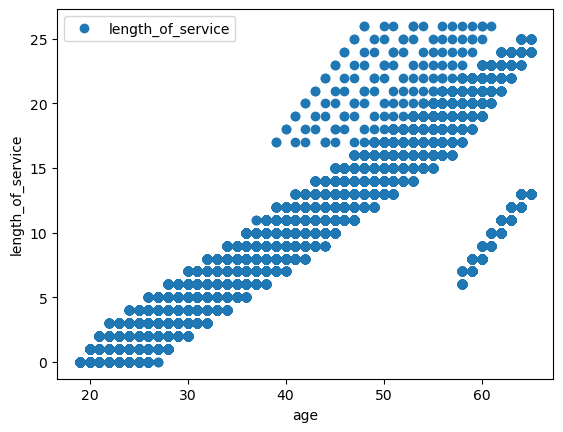

In [39]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x ='age', y='length_of_service',style='o') # The style option creates a scatterplot; without it, we only have lines.
  
plt.xlabel('age')  
plt.ylabel('length_of_service')  
plt.show()

### 2. Reshaping the variables

In [44]:
#reshapre the variables we need into numpy arrays and put them in separate objects

X = df['age'].values.reshape(-1,1)
y = df['length_of_service'].values.reshape(-1,1)


(34750, 1)
(14894, 1)
(34750, 1)
(14894, 1)


In [42]:
#checking output
X

array([[52],
       [53],
       [54],
       ...,
       [31],
       [29],
       [23]], dtype=int64)

### 3. Splitting data into test and train

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(34750, 1)
(14894, 1)
(34750, 1)
(14894, 1)


### 4. Fitting the logistic regression model and predicting test results

In [48]:
#create a regression object
regression = LinearRegression()

In [49]:
#fit the regression object onto the training set
regression.fit(X_train, y_train)

LinearRegression()

In [50]:
#predict the values of y using X.
y_predicted = regression.predict(X_test)

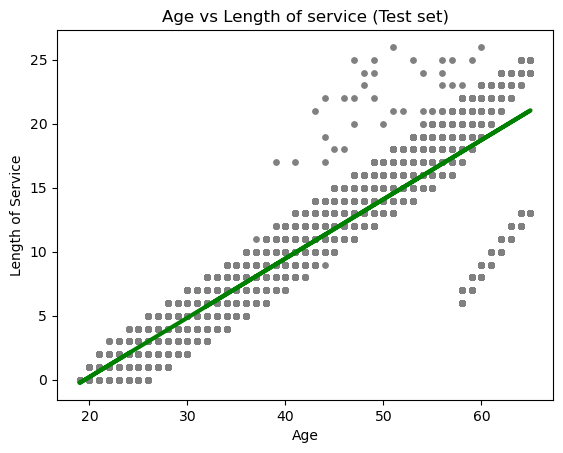

In [52]:
#create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='green', linewidth =3)
plot_test.title('Age vs Length of service (Test set)')
plot_test.xlabel('Age')
plot_test.ylabel('Length of Service')
plot_test.show()

### 5. Evaluating the Model

In [56]:
#creating objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) #mean squared error
r2 = r2_score(y_test, y_predicted) #R2 score. 

In [57]:
#printing the model summary statistics
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.46291406]]
Mean squared error:  6.81421794294146
R2 score:  0.8289530710622455


**Results:** 
    
The slope indicates, as we can also see in the scatterplot, that we have a *positive* correlation. 

The MSE is *6.81...* which is a small number, meaning the regression line passes fairly close to the observations, making it a good fit. 

The R2 score is 0*.82...*, indicating a strong fit. 

### 6. Compare how the regression fits the training set 

In [58]:
#create a dataframe comparing the real and predicted values of y 

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,5,5.766277
1,21,18.727871
2,11,9.932504
3,16,13.172902
4,2,2.988793
5,13,21.042441
6,16,15.950386
7,0,-0.251606
8,19,16.413300
9,10,19.190785


We see some values are very similar, but others are quite different.

In [59]:
#predict
y_predicted_train = regression.predict(X_train) 

In [60]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.46291406]]
Mean squared error:  6.965046929572538
R2 score:  0.8262622070409336


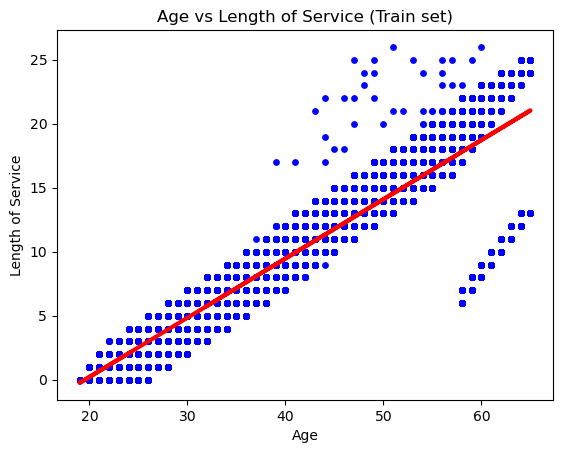

In [61]:
#visualizing the training set results.

plot_test = plt
plot_test.scatter(X_test, y_test, color='blue', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Age vs Length of Service (Train set)')
plot_test.xlabel('Age')
plot_test.ylabel('Length of Service')
plot_test.show()

**Results:** The model outcomes for the training set are very similar to the test set, which is a good sign. Given that there are a number of values that stray from the trend line once the data goes over age 40 it's unsurprising that the model struggled to accurately predict every value, as seen in test prediction dataframe above. 